In [2]:
import tensorflow as tf 
import numpy as np 

In [3]:
np.random.seed(42)
X = np.random.rand(100, 10)  # 100 10-dimensional observations
# binary label classification for each observation
y = np.random.randint(0, 2, size=100)

In [4]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        loss = logs["loss"]
        if loss <= self.threshold:
            self.model.stop_training = True


In [12]:
import tensorflow as tf
import numpy as np

my_callback = MyThresholdCallback(threshold=0.005)

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 10) # 100 datapoints of 10 features each
y = np.random.randint(0, 2, size = 100) # binary classification labels

# Initialize arrays for storing weights
initial_weights = []
final_weights = []
diff_weights = []

# Define the range of units in the first layer
unit_range = np.arange(200, 6005, 200)

diff_avg_avg = np.zeros(len(unit_range))
for j in range(10):
    for units in unit_range:
        # Define the model architecture
        print(f"Number of units: {units}")
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=units, activation='relu', input_shape=(10,)),
            tf.keras.layers.Dense(units=1, activation='sigmoid')
        ])

        # Print initial weights
        initial_weights.append(model.layers[0].get_weights()[0])

        # Compile the model with a loss function and an optimizer
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Train the model using lazy training
        model.fit(X, y, epochs=1000, batch_size=1, callbacks = [my_callback], verbose=0)

        # Print final weights and calculate difference
        final_weights.append(model.layers[0].get_weights()[0])
        diff_weights.append(final_weights[-1] - initial_weights[-1])

    
    diff_avg = []
    for i in range(len(unit_range)):
        diff_weights_flat = np.ndarray.flatten(diff_weights[i])
        diff_weights_flat = np.abs(diff_weights_flat)
        diff_avg.append(np.average(diff_weights_flat))

    diff_avg_avg += diff_avg 

diff_avg_avg /= 10
    


Number of units: 200
Number of units: 400
Number of units: 600
Number of units: 800
Number of units: 1000
Number of units: 1200
Number of units: 1400
Number of units: 1600
Number of units: 1800
Number of units: 2000
Number of units: 2200
Number of units: 2400
Number of units: 2600
Number of units: 2800
Number of units: 3000
Number of units: 3200
Number of units: 3400
Number of units: 3600
Number of units: 3800
Number of units: 4000
Number of units: 4200
Number of units: 4400
Number of units: 4600
Number of units: 4800
Number of units: 5000
Number of units: 5200
Number of units: 5400
Number of units: 5600
Number of units: 5800
Number of units: 6000
Number of units: 200
Number of units: 400
Number of units: 600
Number of units: 800
Number of units: 1000
Number of units: 1200
Number of units: 1400
Number of units: 1600
Number of units: 1800
Number of units: 2000
Number of units: 2200
Number of units: 2400
Number of units: 2600
Number of units: 2800
Number of units: 3000
Number of units: 3

In [7]:
diff_avg = []
for i in range(len(unit_range)):
    diff_weights_flat = np.ndarray.flatten(diff_weights[i])
    diff_weights_flat = np.abs(diff_weights_flat)
    diff_avg.append(np.average(diff_weights_flat))

In [46]:
import tensorflow as tf
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 10) # 100 datapoints of 10 features each
y = np.random.randint(0, 2, size = 100) # binary classification labels

# Initialize arrays for storing weights
initial_weights_ml_1 = []
final_weights_ml_1 = []
initial_weights_ml_2 = []
final_weights_ml_2 = []
diff_weights_ml_1 = []
diff_weights_ml_2 = []

# Define the range of units in the first layer
unit_range = np.arange(200, 2405, 200)

for units in unit_range:
    # Define the model architecture
    print(f"Number of units per layer: {int(units / 2)}")
    print(f"Number of layers: 2")
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units=units / 2, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(units = units / 2, activation = 'relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Print initial weights
    initial_weights_ml_1.append(model.layers[0].get_weights()[0])
    initial_weights_ml_2.append(model.layers[1].get_weights()[0])

    # Compile the model with a loss function and an optimizer
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model using lazy training
    model.fit(X, y, epochs=1000, batch_size=1, callbacks = [my_callback], verbose=0)

    # Print final weights and calculate difference
    final_weights_ml_1.append(model.layers[0].get_weights()[0])
    final_weights_ml_2.append(model.layers[1].get_weights()[0])

    diff_weights_ml_1.append(final_weights_ml_1[-1] - initial_weights_ml_1[-1])
    diff_weights_ml_2.append(final_weights_ml_2[-1] - initial_weights_ml_2[-1])


Number of units per layer: 100
Number of layers: 2
Number of units per layer: 200
Number of layers: 2
Number of units per layer: 300
Number of layers: 2
Number of units per layer: 400
Number of layers: 2
Number of units per layer: 500
Number of layers: 2
Number of units per layer: 600
Number of layers: 2
Number of units per layer: 700
Number of layers: 2
Number of units per layer: 800
Number of layers: 2
Number of units per layer: 900
Number of layers: 2
Number of units per layer: 1000
Number of layers: 2
Number of units per layer: 1100
Number of layers: 2
Number of units per layer: 1200
Number of layers: 2


In [47]:
diff_avg_ml_1 = []
diff_avg_ml_2 = []

for i in range(len(unit_range)):
    diff_weights_flat_ml_1 = np.ndarray.flatten(diff_weights_ml_1[i])
    diff_weights_flat_ml_1 = np.abs(diff_weights_flat_ml_1)
    diff_avg_ml_1.append(np.average(diff_weights_flat_ml_1))

for i in range(len(unit_range)):
    diff_weights_flat_ml_2 = np.ndarray.flatten(diff_weights_ml_2[i])
    diff_weights_flat_ml_2 = np.abs(diff_weights_flat_ml_2)
    diff_avg_ml_2.append(np.average(diff_weights_flat_ml_2))

diff_avg_ml_sum = []
for i in range(len(unit_range)):
    diff_avg_ml_sum.append(diff_avg_ml_1[i] + diff_avg_ml_2[i])

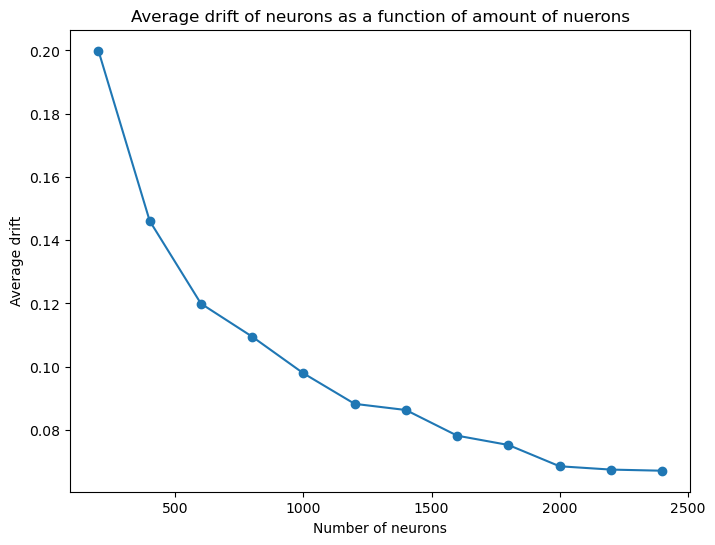

In [48]:
import matplotlib.pyplot as plt

# set the size of the figure
fig, ax = plt.subplots(figsize = (8, 6))

# create the plot
ax.plot(unit_range, diff_avg, linestyle = '-', marker = 'o')

# set the title and axis labels
ax.set_title('Average drift of neurons as a function of amount of nuerons')
ax.set_xlabel('Number of neurons')
ax.set_ylabel('Average drift')


# display the plot
plt.show()

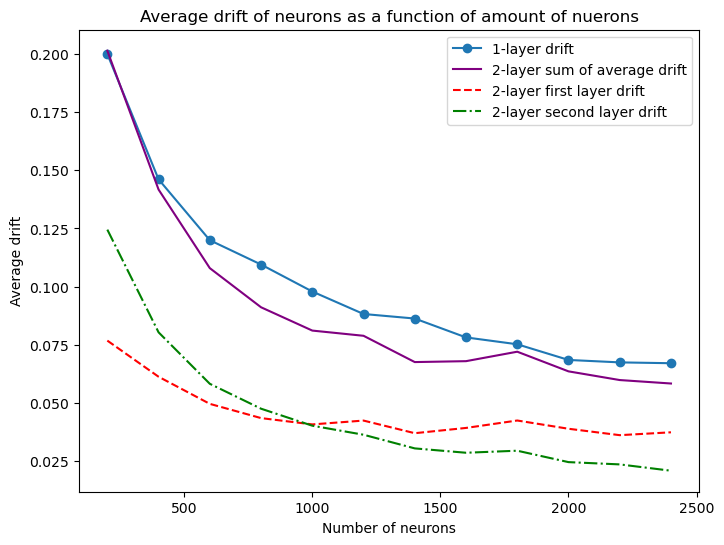

In [49]:
import matplotlib.pyplot as plt

# set the size of the figure
fig, ax = plt.subplots(figsize = (8, 6))

# create the plot
line1, = ax.plot(unit_range, diff_avg, linestyle = '-', marker = 'o', label = '1-layer drift')
line2, = ax.plot(unit_range, diff_avg_ml_sum, linestyle = '-', color = 'purple', label = '2-layer sum of average drift')
line3, = ax.plot(unit_range, diff_avg_ml_1, linestyle = '--', color = 'red', label = '2-layer first layer drift')
line4, = ax.plot(unit_range, diff_avg_ml_2, linestyle = '-.', color = 'green', label = '2-layer second layer drift')



# set the title and axis labels
ax.set_title('Average drift of neurons as a function of amount of nuerons')
ax.set_xlabel('Number of neurons')
ax.set_ylabel('Average drift')

ax.legend()


# display the plot
plt.show()

In [14]:
import tensorflow as tf
import numpy as np

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 10) # 100 datapoints of 10 features each
y = np.random.randint(0, 2, size = 100) # binary classification labels

# Initialize arrays for storing weights
initial_weights_ml_1 = []
final_weights_ml_1 = []
initial_weights_ml_2 = []
final_weights_ml_2 = []
diff_weights_ml_1 = []
diff_weights_ml_2 = []

# Define the range of units in the first layer
unit_range = np.arange(200, 6005, 200)



diff_avg_ml_1_avg = np.zeros(len(unit_range))
diff_avg_ml_2_avg = np.zeros(len(unit_range))
diff_avg_ml_avg = np.zeros(len(unit_range))

for j in range(10):
    for units in unit_range:
        # Define the model architecture
        print(f"Layer neurons: {int(units / 2)}, {int(units / 20)}")
        print(f"Number of layers: 2")
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=units / 2, activation='relu', input_shape=(10,)),
            tf.keras.layers.Dense(units = units / 20, activation = 'relu'),
            tf.keras.layers.Dense(units=1, activation='sigmoid')
        ])

        # Print initial weights
        initial_weights_ml_1.append(model.layers[0].get_weights()[0])
        initial_weights_ml_2.append(model.layers[1].get_weights()[0])

        # Compile the model with a loss function and an optimizer
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Train the model using lazy training
        model.fit(X, y, epochs=1000, batch_size=1, callbacks = [my_callback], verbose=0)

        # Print final weights and calculate difference
        final_weights_ml_1.append(model.layers[0].get_weights()[0])
        final_weights_ml_2.append(model.layers[1].get_weights()[0])

        diff_weights_ml_1.append(final_weights_ml_1[-1] - initial_weights_ml_1[-1])
        diff_weights_ml_2.append(final_weights_ml_2[-1] - initial_weights_ml_2[-1])

    diff_avg_ml_1 = []
    diff_avg_ml_2 = []

    for i in range(len(unit_range)):
        diff_weights_flat_ml_1 = np.ndarray.flatten(diff_weights_ml_1[i])
        diff_weights_flat_ml_1 = np.abs(diff_weights_flat_ml_1)
        diff_avg_ml_1.append(np.average(diff_weights_flat_ml_1))

    for i in range(len(unit_range)):
        diff_weights_flat_ml_2 = np.ndarray.flatten(diff_weights_ml_2[i])
        diff_weights_flat_ml_2 = np.abs(diff_weights_flat_ml_2)
        diff_avg_ml_2.append(np.average(diff_weights_flat_ml_2))

    diff_avg_ml_sum = []
    for i in range(len(unit_range)):
        diff_avg_ml_sum.append(diff_avg_ml_1[i] + diff_avg_ml_2[i])

    diff_avg_ml_1_avg += diff_avg_ml_1 
    diff_avg_ml_2_avg += diff_avg_ml_2 
    diff_avg_ml_avg += diff_avg_ml_sum

diff_avg_ml_1_avg /= 10
diff_avg_ml_2_avg /= 10
diff_avg_ml_avg /= 10
    

    


Layer neurons: 100, 10
Number of layers: 2
Layer neurons: 200, 20
Number of layers: 2
Layer neurons: 300, 30
Number of layers: 2
Layer neurons: 400, 40
Number of layers: 2
Layer neurons: 500, 50
Number of layers: 2
Layer neurons: 600, 60
Number of layers: 2
Layer neurons: 700, 70
Number of layers: 2
Layer neurons: 800, 80
Number of layers: 2
Layer neurons: 900, 90
Number of layers: 2
Layer neurons: 1000, 100
Number of layers: 2
Layer neurons: 1100, 110
Number of layers: 2
Layer neurons: 1200, 120
Number of layers: 2
Layer neurons: 1300, 130
Number of layers: 2
Layer neurons: 1400, 140
Number of layers: 2
Layer neurons: 1500, 150
Number of layers: 2
Layer neurons: 1600, 160
Number of layers: 2
Layer neurons: 1700, 170
Number of layers: 2
Layer neurons: 1800, 180
Number of layers: 2
Layer neurons: 1900, 190
Number of layers: 2
Layer neurons: 2000, 200
Number of layers: 2
Layer neurons: 2100, 210
Number of layers: 2
Layer neurons: 2200, 220
Number of layers: 2
Layer neurons: 2300, 230
Num

In [15]:
diff_avg_avg *= len(unit_range)
diff_avg_avg /= 10

diff_avg_ml_1_avg *= len(unit_range)
diff_avg_ml_2_avg *= len(unit_range)
diff_avg_ml_avg *= len(unit_range)

diff_avg_ml_1_avg /= 10
diff_avg_ml_2_avg /= 10
diff_avg_ml_avg /= 10



In [9]:
diff_avg_ml_1 = []
diff_avg_ml_2 = []

for i in range(len(unit_range)):
    diff_weights_flat_ml_1 = np.ndarray.flatten(diff_weights_ml_1[i])
    diff_weights_flat_ml_1 = np.abs(diff_weights_flat_ml_1)
    diff_avg_ml_1.append(np.average(diff_weights_flat_ml_1))

for i in range(len(unit_range)):
    diff_weights_flat_ml_2 = np.ndarray.flatten(diff_weights_ml_2[i])
    diff_weights_flat_ml_2 = np.abs(diff_weights_flat_ml_2)
    diff_avg_ml_2.append(np.average(diff_weights_flat_ml_2))

diff_avg_ml_sum = []
for i in range(len(unit_range)):
    diff_avg_ml_sum.append(diff_avg_ml_1[i] + diff_avg_ml_2[i])

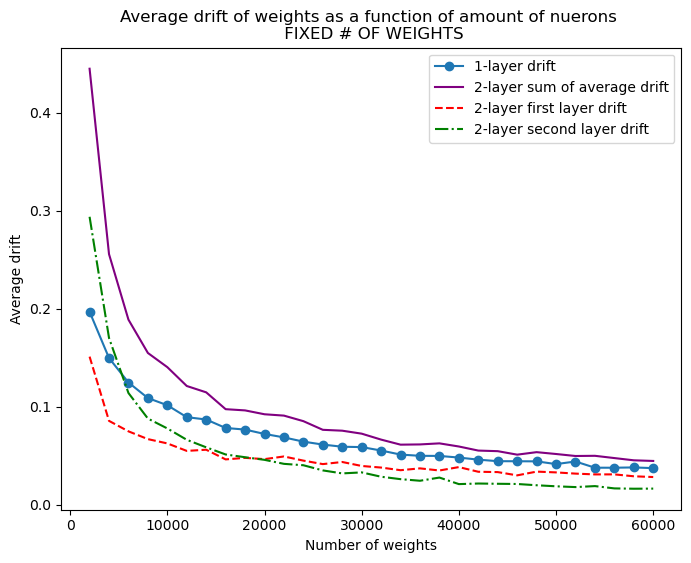

In [16]:
import matplotlib.pyplot as plt

# set the size of the figure
fig, ax = plt.subplots(figsize = (8, 6))

# create the plot
line1, = ax.plot(10 * unit_range, diff_avg_avg, linestyle = '-', marker = 'o', label = '1-layer drift')
line2, = ax.plot(10 * unit_range, diff_avg_ml_avg, linestyle = '-', color = 'purple', label = '2-layer sum of average drift')
line3, = ax.plot(10 * unit_range, diff_avg_ml_1_avg, linestyle = '--', color = 'red', label = '2-layer first layer drift')
line4, = ax.plot(10 * unit_range, diff_avg_ml_2_avg, linestyle = '-.', color = 'green', label = '2-layer second layer drift')



# set the title and axis labels
ax.set_title('Average drift of weights as a function of amount of nuerons \n FIXED # OF WEIGHTS')
ax.set_xlabel('Number of weights')
ax.set_ylabel('Average drift')

ax.legend()


# display the plot
plt.show()

In [17]:
from sklearn.manifold import TSNE 
import pandas as pd 
import seaborn as sns 

In [51]:
print(X.shape)
print(np.transpose(final_weights[-1]).shape)

(100, 10)
(6000, 10)


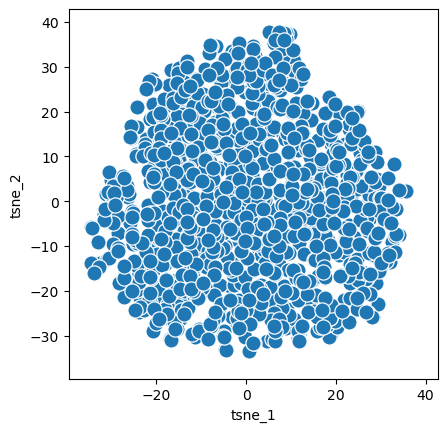

In [54]:
n_components = 2 
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(np.transpose(initial_weights[4]))
tsne_result.shape 
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')

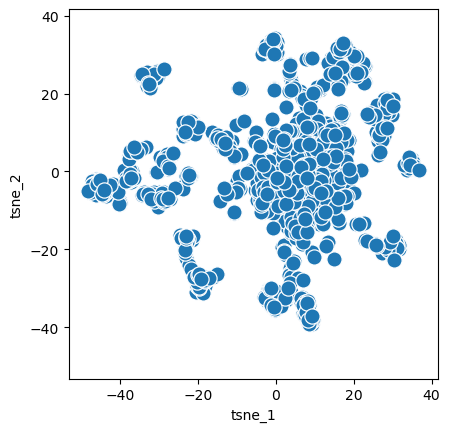

In [56]:
n_components = 2 
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(np.transpose(final_weights[4]))
tsne_result.shape 
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')